In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

import matplotlib.pyplot as plt
from CorrectFeatures import correct_SCT_data, correct_SCT_labels

In [48]:
training_data = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_training.csv"))
training_labels = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_training.csv"))

In [49]:
model_4_hours = LinearRegression()
model_8_hours = LinearRegression()
model_12_hours = LinearRegression()
model_long_hours = LinearRegression()


In [50]:
Y = training_labels

In [51]:
# Y = training_labels.drop(columns = ['attendance', 'number_over_4_hours',
#        'number_over_8_hours', 'percentage_within_8_hours',
#        'number_over_12_hours', 'percentage_within_12_hours',
#        'number_under_4_hours', 'number_4_hours_8_hours',
#        'number_8_hours_12_hours', 'percentage_within_4_hours'])

In [52]:
X = training_data

In [53]:
# X = training_data
# X["region_east"] = 1.0 *(X["region"] == "East")
# X["region_west"] =  1.0 *(X["region"] == "West")
# X["region_north"] =  1.0 *(X["region"] == "North")
# X = X.drop(columns=["region", "moon_phase_name"])
# for col in X.columns:
#     X[col] = X[col].astype(str).str.replace(',', '').astype(float)
#     if X[col].isna().any():
#         X[col] = X[col].fillna(0)

In [54]:
model_4_hours.fit(X,Y.proportion_under_4_hours)
model_8_hours.fit(X,Y.proportion_4_hours_8_hours)
model_12_hours.fit(X,Y.proportion_8_hours_12_hours)
model_long_hours.fit(X,Y.proportion_over_12_hours)


LinearRegression()

In [55]:
(mean_absolute_error(Y.proportion_under_4_hours, model_4_hours.predict(X)),
 mean_absolute_error(Y.proportion_4_hours_8_hours, model_8_hours.predict(X)),
 mean_absolute_error(Y.proportion_8_hours_12_hours, model_12_hours.predict(X)),
 mean_absolute_error(Y.proportion_over_12_hours, model_long_hours.predict(X)))

(0.040769120388660485,
 0.03389083673711806,
 0.006443619687333023,
 0.0026055266636309865)

In [56]:
testing_data = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_testing.csv"))
testing_labels = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_testing.csv"))

In [57]:
Y_test = testing_labels
X_test = testing_data

In [59]:
(mean_absolute_error(Y_test.proportion_under_4_hours, model_4_hours.predict(X_test)),
 mean_absolute_error(Y_test.proportion_4_hours_8_hours, model_8_hours.predict(X_test)),
 mean_absolute_error(Y_test.proportion_8_hours_12_hours, model_12_hours.predict(X_test)),
 mean_absolute_error(Y_test.proportion_over_12_hours, model_long_hours.predict(X_test)))

(0.039634497820690555,
 0.033196648875307516,
 0.006200381636722137,
 0.002470083438149593)

In [60]:
def divide_by_sum(tuple_):
    sum_ = sum(tuple_)
    return [e/sum_ for e in tuple_]
normed_predictions = [list(l) for l in
                      zip(*map(divide_by_sum,
                               zip(model_4_hours.predict(X_test),
                                   model_8_hours.predict(X_test),
                                   model_12_hours.predict(X_test),
                                   model_long_hours.predict(X_test))))
                      ]
(mean_absolute_error(Y_test.proportion_under_4_hours, normed_predictions[0]),
 mean_absolute_error(Y_test.proportion_4_hours_8_hours, normed_predictions[1]),
 mean_absolute_error(Y_test.proportion_8_hours_12_hours, normed_predictions[2]),
 mean_absolute_error(Y_test.proportion_over_12_hours, normed_predictions[3]))

(0.039550948373206864,
 0.03320514897340142,
 0.006202817816597094,
 0.0024712806191527054)

In [61]:
model_bytes = pickle.dumps((model_4_hours,
                            model_8_hours,
                            model_12_hours,
                            model_long_hours))
print(len(model_bytes))
with open("Models/TrainingLinearRegressionScotlandModel.pkl", 'wb') as save_file:
    save_file.write(model_bytes)


33949


In [62]:
model_4_hours_loaded,\
model_8_hours_loaded,\
model_12_hours_loaded,\
model_long_hours_loaded = None, None, None, None
with open("Models/TrainingLinearRegressionScotlandModel.pkl", 'rb') as save_file:
    model_bytes = save_file.read()
    print(len(model_bytes))
    model_4_hours_loaded,\
    model_8_hours_loaded,\
    model_12_hours_loaded,\
    model_long_hours_loaded = pickle.loads(model_bytes)

33949


In [63]:
(model_4_hours.coef_ + model_8_hours.coef_ + model_12_hours.coef_ + model_long_hours.coef_) / 4

array([-1.47171975e-20,  7.95807860e-11,  2.55067851e-11, -4.22809765e-11,
       -3.38800559e-12,  6.20728100e-12, -1.32423594e-11, -7.48059392e-11,
       -5.89352567e-10, -7.20774551e-11, -4.75452983e-12, -7.95807864e-12,
       -1.74864568e-11, -1.98951966e-11,  5.82645043e-13,  3.08943982e-11,
        2.63469246e-11,  4.94395636e-11,  8.82209861e-11,  3.81827903e-12,
       -1.92085281e-09,  1.72440195e-09, -4.00177669e-11, -3.74711817e-10,
        2.47382559e-10,  3.06954462e-12,  3.77440301e-11,  4.44742909e-10,
       -1.88720151e-11,  3.03998604e-09,  7.02129910e-10,  3.80623533e-10,
       -2.35331754e-11,  5.82076609e-11, -4.93400876e-11, -7.49764695e-11,
       -1.40289558e-10, -1.13118404e-10, -2.08473239e-11, -4.32009983e-11,
        1.03455022e-11, -3.39070994e-11, -1.86446414e-11, -5.34328137e-12,
       -8.11724021e-11, -4.10977918e-11,  1.13686838e-11, -3.22870619e-11,
        1.13686838e-12, -4.11546353e-11, -6.02540240e-12,  7.57154339e-11,
        3.16049409e-11, -

In [64]:
import numpy as np

In [65]:
coef_pd = pd.DataFrame((np.abs(model_4_hours.coef_) +
                        np.abs(model_8_hours.coef_) +
                        np.abs(model_12_hours.coef_) +
                        np.abs(model_long_hours.coef_)) / 4, X.columns, columns=['Coefficients'])

In [66]:
coef_pd.sort_values("Coefficients", ascending=False)

,Coefficients
provides_no_unpaid_care,571399.171925
all_people_total,474863.225966
day-to-day_activities_not_limited,442435.513011
living_in_a_couple_total,410005.465400
living_in_a_couple_married_or_in_a_registered_same-sex_civil_partnership,386751.793270
...,...
DailyDeaths,0.000064
attendance,0.000044
moon_phase,0.000035
DailyNegative,0.000002


In [67]:
# model_4_hours.n_features_in

In [68]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_4_hours = permutation_importances(model_4_hours, X, Y.proportion_under_4_hours, r2)[:10]
perm_imp_8_hours = permutation_importances(model_8_hours, X, Y.proportion_4_hours_8_hours, r2)[:10]
perm_imp_12_hours = permutation_importances(model_12_hours, X, Y.proportion_8_hours_12_hours, r2)[:10]
perm_imp_long_hours = permutation_importances(model_long_hours, X, Y.proportion_over_12_hours, r2)[:10]

Text(0.5, 0.98, 'Feature Importance for Scottish models')

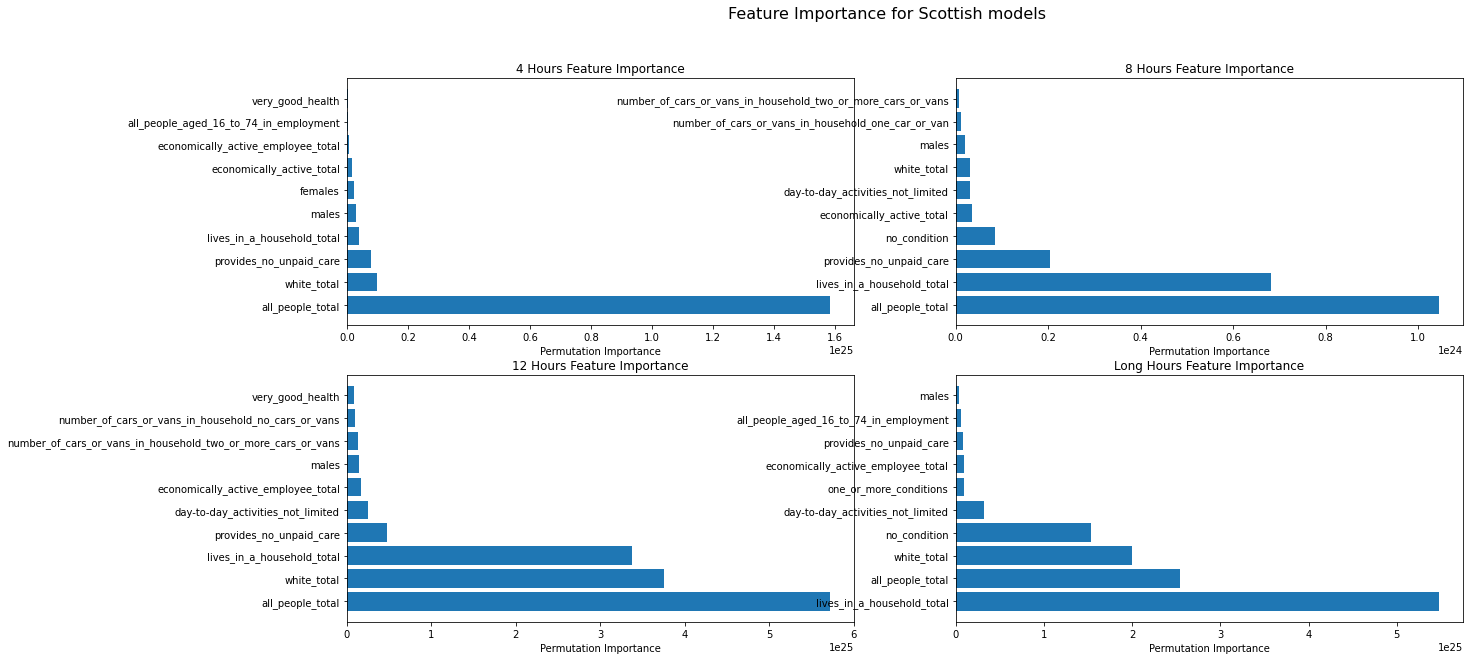

Text(0.5, 0.98, 'Feature Importance for Scottish models')

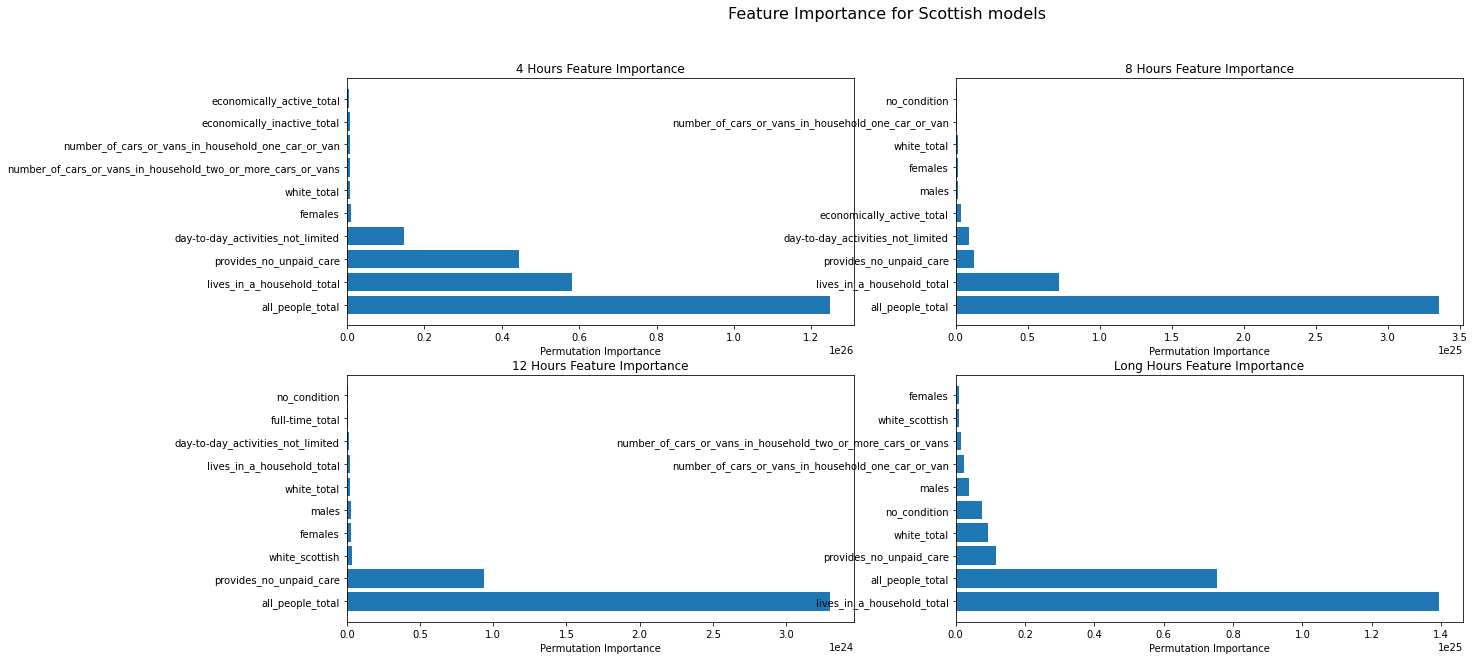

In [69]:
fig, axs = plt.subplots(2, 2)

axs[0,0].barh(perm_imp_4_hours.index, perm_imp_4_hours.Importance)
axs[0,0].set_title("4 Hours Feature Importance")

axs[0,1].barh(perm_imp_8_hours.index, perm_imp_8_hours.Importance)
axs[0,1].set_title("8 Hours Feature Importance")

axs[1,0].barh(perm_imp_12_hours.index, perm_imp_12_hours.Importance)
axs[1,0].set_title("12 Hours Feature Importance")

axs[1,1].barh(perm_imp_long_hours.index, perm_imp_long_hours.Importance)
axs[1,1].set_title("Long Hours Feature Importance")

for ax_r in axs:
    for ax in ax_r:
        ax.set_xlabel("Permutation Importance")

fig.set_size_inches(20, 10)
fig.suptitle("Feature Importance for Scottish models", fontsize=16)